In [1321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1322]:
data = pd.read_csv('readmit (1).csv')
#data.drop('HSP_ACCOUNT_ID',axis=1,inplace=True)

In [1323]:
data = data[data['Days_Stay_Current'] >= 0]
data = data.dropna(axis=0,how='any')

def squish(val):
    if val > 0:
        return 1
    else:
        return 0
    
data['CntAdmitsSubsequent'] = data['CntAdmitsSubsequent'].apply(lambda x: squish(x))
data.drop(['Corticosteroids.1'], axis=1, inplace=True)

#data['EKGCount'] = data['EKGCount'].apply(lambda x: str(x))


In [1324]:
isPeds = False

if isPeds:
    data = data[data['Age'] <= 18]
    data.drop(['BUNVal','CreatinineVal','PO4Val'], axis=1)
else:
    data = data[data['Age'] >= 18]
    data.drop(['BUNVal'], axis=1)


#data = data[data['HSP_ACCOUNT_ID'] >= 40000000]


In [1325]:
data['CntAdmitsSubsequent'].value_counts()

0    59159
1     9316
Name: CntAdmitsSubsequent, dtype: int64

In [1326]:
data.head()

,HSP_ACCOUNT_ID,Age,AdmDate,DischDate,CntAdmitsSubsequent,NumberActiveMedOrders,Days_Stay_Current,CntComorbidityDXLast12Months,CntNumPastEDVisits,FutureAppts,...,UlcerMeds,ImagingCount,EKGCount,RestraintCount,CancerDX,ElectroylyteDisorderDX,DeficiencyAnemiaDX,RenalFailureDX,LOSge10Last12Month,DrugAbuseDX
0,20673302,18,7/17/2016,10/7/2016,0,83,82.0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
1,20711863,57,9/23/2016,10/3/2016,0,63,10.0,0,5,0,...,1,1,1,1,0,1,0,0,0,0
2,20714113,60,9/27/2016,10/3/2016,0,32,6.0,0,4,0,...,1,1,0,0,1,1,0,0,0,1
3,20715188,24,9/28/2016,10/12/2016,1,28,9.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,20715259,28,9/29/2016,10/1/2016,0,26,2.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [1327]:
data.describe()

,HSP_ACCOUNT_ID,Age,CntAdmitsSubsequent,NumberActiveMedOrders,Days_Stay_Current,CntComorbidityDXLast12Months,CntNumPastEDVisits,FutureAppts,HemoglobinVal,CalciumVal,...,UlcerMeds,ImagingCount,EKGCount,RestraintCount,CancerDX,ElectroylyteDisorderDX,DeficiencyAnemiaDX,RenalFailureDX,LOSge10Last12Month,DrugAbuseDX
count,6.847500e+04,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,...,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000,68475.000000
mean,3.891440e+07,47.140007,0.136050,46.225863,5.658532,0.186798,1.886937,0.327915,0.156612,0.004819,...,0.626740,0.720190,0.541307,0.105119,0.100241,0.085330,0.000277,0.031355,0.089346,0.038832
std,9.819483e+06,17.098450,0.342844,41.899501,9.029245,1.063111,6.649610,0.469457,0.363437,0.069254,...,0.483674,0.448909,0.498294,0.306708,0.300323,0.279375,0.016655,0.174275,0.285245,0.193195
min,2.026316e+07,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.147635e+07,32.000000,0.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.204044e+07,48.000000,0.000000,35.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.267214e+07,60.000000,0.000000,56.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.021894e+07,117.000000,1.000000,1242.000000,876.000000,24.000000,170.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1328]:
#data.info()

In [1329]:
#dummify count vars

#def dummy(val):
#    if val == 0:
#        return 0
#    else:
#        return 1

#def dummy_col(col):
#    return col.apply(lambda x: dummy(x))

#dummycols = ['Anticoagulants', 'Corticosteroids', 'NSAIDs', 'UlcerMeds',
#             'ImagingCount', 'EKGCount', 'RestraintCount', 'ElectroylyteDisorderDX', 'DrugAbuseDX' ]

#for i in range(0,len(dummycols)):
#    data[dummycols[i]] = dummy_col(data[dummycols[i]])

In [1330]:
from sklearn.model_selection import train_test_split

In [1331]:
har = data['HSP_ACCOUNT_ID']
data.drop(['HSP_ACCOUNT_ID', 'AdmDate', 'DischDate'], axis=1, inplace=True)
y = data['CntAdmitsSubsequent']
data.drop(['CntAdmitsSubsequent'], axis=1, inplace=True)
X = data

In [1332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1333]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [1334]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [1335]:
coef = pd.DataFrame({'coef' : pd.Series(logmodel.coef_[0]), 'features' : pd.Series(X_train.columns)})

In [1336]:
coef = coef[['features', 'coef']]

In [1337]:
coef

,features,coef
0,Age,-0.004366
1,NumberActiveMedOrders,-0.001055
2,Days_Stay_Current,0.002173
3,CntComorbidityDXLast12Months,0.026679
4,CntNumPastEDVisits,0.069177
5,FutureAppts,-0.115441
6,HemoglobinVal,-0.140886
7,CalciumVal,0.206042
8,BUNVal,-0.738373
9,CreatinineVal,0.065737


In [1338]:
predictions = logmodel.predict(X_test)
train_predictions = logmodel.predict(X_train)


In [1339]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import brier_score_loss

<function matplotlib.pyplot.show>

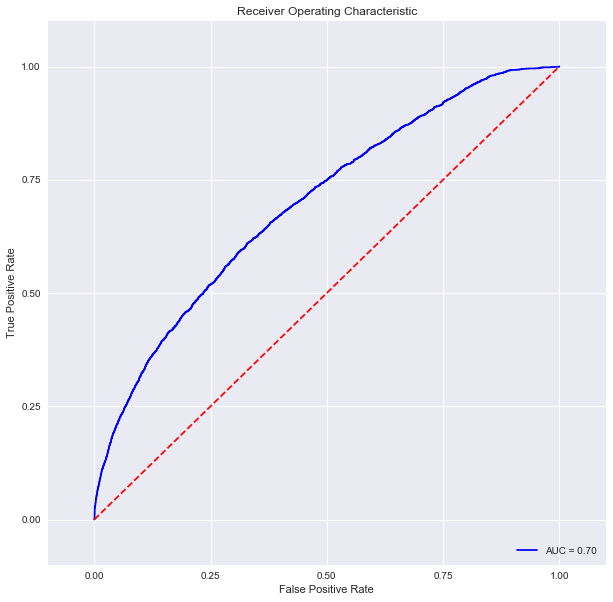

In [1340]:
probs = logmodel.predict_proba(X_test)[:, 1]
probs_train = logmodel.predict_proba(X_train)[:,1]

fpr, tpr, thresholds_auc = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.locator_params(nbins=6)
plt.show

In [1341]:
har = har[0:4461]

In [1342]:
#dash = pd.DataFrame({'HAR' : har, 'Readmit Risk' : probs, 'Outcome' : y_test})

In [1343]:
dash.head(10)

,HAR,Readmit Risk
0,20673302,0.555620
7,20715876,0.416971
11,20717062,0.562359
12,20717063,0.276276
26,20724194,0.351055
27,20725049,0.486961
34,20715970,0.741473
42,20718804,0.541136
47,20721608,0.342750
53,20724013,0.342648


In [1344]:
matrix = pd.DataFrame(data=confusion_matrix(y_test, predictions))
matrix.columns = ['Pred No', 'Pred Yes']
matrix.index = ['Act No', 'Act Yes']
matrix

,Pred No,Pred Yes
Act No,12213,5527
Act Yes,1147,1656


<h4> % of Total Readmission Caught</h4>

In [1345]:
matrix.iloc[1,1]/matrix.iloc[1,:].sum()

0.59079557616839096

<h4> False Positive Rate</h4>

In [1346]:
matrix.iloc[0,1]/matrix.iloc[0,:].sum()

0.31155580608793687

In [1347]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.69      0.79     17740
          1       0.23      0.59      0.33      2803

avg / total       0.82      0.68      0.72     20543



<h4> Brier Score - Peds </h4>

In [1348]:
print(brier_score_loss(y_test,probs))

0.215899912528


In [1349]:
peds = pd.DataFrame({'labels' : y_test, 'predictions' : probs})
peds = pd.concat([peds, X_test], axis=1)

In [1350]:
cls = RandomForestClassifier(class_weight='balanced', max_depth=3)
cls

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1351]:
cls.fit(X_train, y_train)

cls_predictions = cls.predict(X_test)
cls_probs = cls.predict_proba(X_test)[:,1]

In [1352]:
matrix = pd.DataFrame(data=confusion_matrix(y_test, cls_predictions))
matrix.columns = ['Pred No', 'Pred Yes']
matrix.index = ['Act No', 'Act Yes']
matrix

,Pred No,Pred Yes
Act No,9916,7824
Act Yes,943,1860


In [1353]:
matrix.iloc[1,1]/matrix.iloc[1,:].sum()

0.6635747413485551

In [1354]:
matrix.iloc[0,1]/matrix.iloc[0,:].sum()

0.44103720405862457

In [1355]:
print(classification_report(y_test,cls_predictions))

             precision    recall  f1-score   support

          0       0.91      0.56      0.69     17740
          1       0.19      0.66      0.30      2803

avg / total       0.81      0.57      0.64     20543



<function matplotlib.pyplot.show>

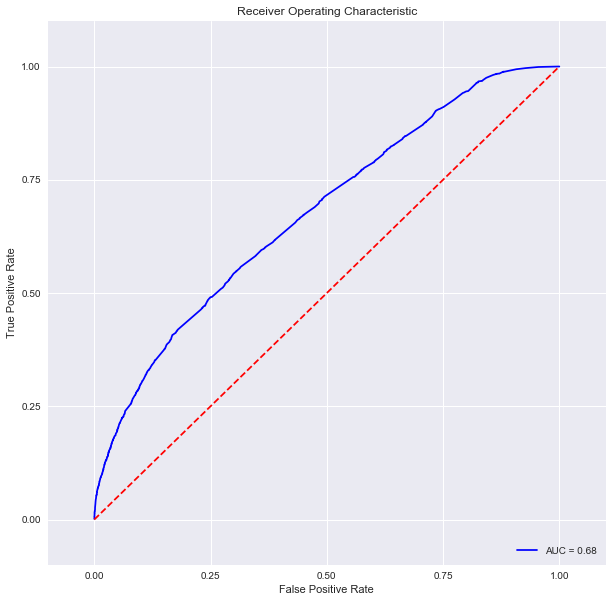

In [1356]:
fpr, tpr, thresholds_auc = roc_curve(y_test, cls_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.locator_params(nbins=6)
plt.show

In [1357]:
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

param = {
    'max_depth': 5, # the maximum depth of each tree
    'eta': 0.3, # the training step for each iteration
    'silent': 1, # Logging mode - quiet
    'objective': 'multi:softprob', # error evaluation for multiclass training
    'num_class': 2 # the number of classes that exist in this dataset
}
num_round = 20 # the number of training iterations

bst = xgb.train(param, dtrain_svm, num_round)


In [1358]:
xgb_preds = bst.predict(dtest_svm)

In [1359]:
xgb_preds = np.asarray([np.argmax(line) for line in xgb_preds])

In [1360]:
from sklearn.metrics import precision_score

print(precision_score(y_test, xgb_preds, average='macro'))

0.755117251078


In [1361]:
matrix = pd.DataFrame(data=confusion_matrix(y_test, xgb_preds))
matrix.columns = ['Pred No', 'Pred Yes']
matrix.index = ['Act No', 'Act Yes']
matrix

,Pred No,Pred Yes
Act No,17617,123
Act Yes,2586,217
